### Running CombineScript.py

In [1]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\2842321421.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\2842321421.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\2842321421.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whites

Done Combining the training data


C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\2842321421.py:90: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\2842321421.py:91: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\2842321421.py:92: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=T

Done Combining the testing data
Done Combining the data


### Running MakeDataset.py

In [2]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",")
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
%config InlineBackend.figure_format='retina'

# TASK 1

### Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


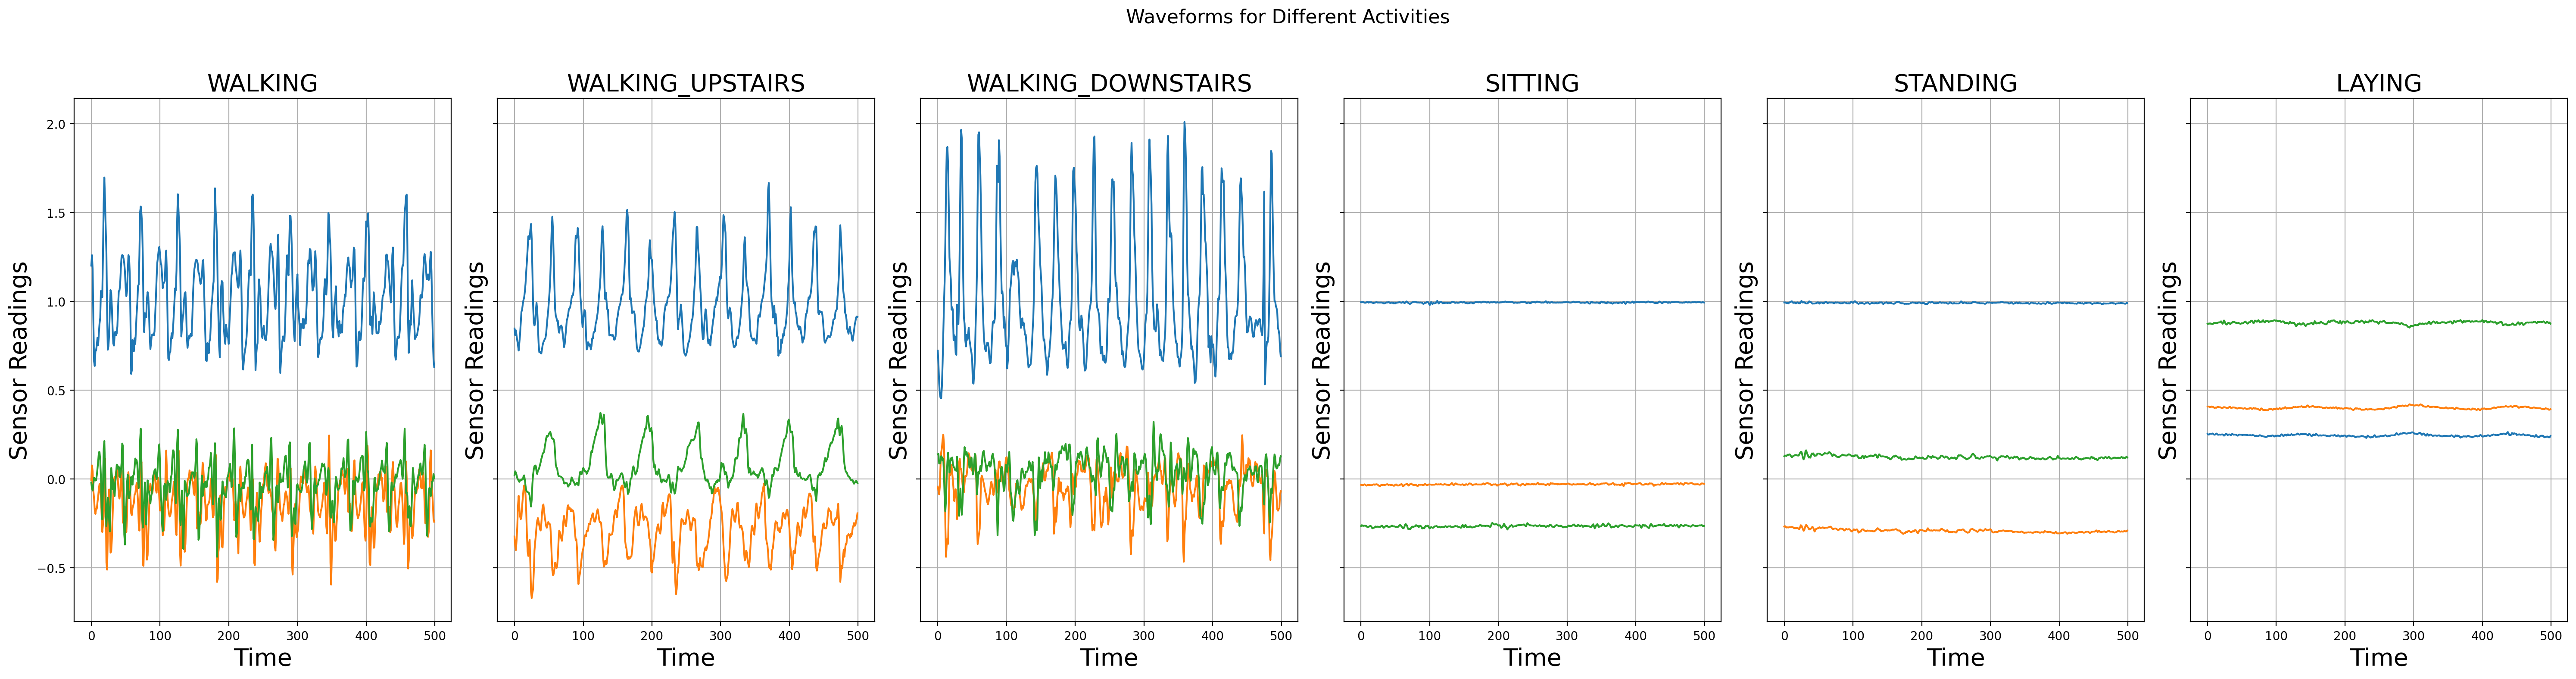

In [4]:
# Mapping class labels back to activity names
activity = {v: k for k, v in classes.items()}
print(activity)

# Extract one sample per activity class
samples = {}
for i in classes.values():
    samples[i] = X_train[y_train == i][5] 

# Plotting the waveforms
fig, axes = plt.subplots(1, 6, figsize=(30,8), sharey=True)
fig.suptitle('Waveforms for Different Activities', fontsize=16)

for index, (label, sample) in enumerate(samples.items()):
    axes[index].plot(sample, linewidth = 1.5)
    axes[index].set_title(activity[label],fontsize=20)
    axes[index].set_xlabel('Time',fontsize=20)
    axes[index].set_ylabel('Sensor Readings',fontsize=20)
    axes[index].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The waveforms displayed show a clear visual difference between the patterns of static activities (lying, sitting, and standing) and dynamic activities (walking, walking downstairs, walking upstairs).

SIMILARITIES BETWEEN STATIC ACTIVITIES:
The static activities show nearly flat lines with respect to time. The acceleration values remain nearly constant, with minimal changes.

SIMILARITIES BETWEEN DYNAMIC ACTIVITIES:
The dynamic activities show oscillating waveforms that vary significantly over time.The acceleration values follow a regular pattern, corresponding with the periodic nature of these dynamic walking activities.

Using waveform charts, a machine learning model might be able to characterize the activity as static or dynamic. Without additional features or preprocessing, it may be difficult to predict the specific type of dynamic or static activity.

Feature extraction approaches (such as TSFEL) may help aggregate time-series data into useful metrics that show variations across activities. Scaling and normalizing data may speed up or enhance performance.


### Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration (accx^2+accy^2+accz^2) for each activity and justify your answer. 

In [5]:
total_acceleration = np.sqrt(np.sum(X_train**2, axis=2))  

In [6]:
total_acceleration_df = pd.DataFrame(total_acceleration)
total_acceleration_df['activities'] = y_train
total_acceleration_df

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,activities
0,1.416068,1.469830,1.507918,1.452425,1.216848,1.090201,1.111856,1.071870,1.106612,1.185212,...,1.058595,1.025795,0.947143,0.796857,0.680303,0.626330,0.605694,0.635672,0.686495,2
1,1.006833,1.010369,1.012569,1.013501,1.011932,1.011234,1.013346,1.013446,1.013776,1.013496,...,1.014921,1.007778,0.999139,1.003189,1.006525,1.001850,1.005747,1.010640,1.009673,6
2,1.030329,1.033822,1.037612,1.040009,1.040998,1.043643,1.043321,1.038132,1.035484,1.036237,...,1.034021,1.035409,1.035741,1.034289,1.032960,1.033137,1.034441,1.035164,1.032298,5
3,0.705104,0.747597,0.793106,0.873028,0.868487,0.860511,0.959374,1.044385,1.061314,1.014860,...,1.318746,1.544286,1.634954,1.534755,1.412596,1.289917,1.179780,1.195202,1.141141,2
4,0.725529,0.782913,0.790660,0.785682,0.809201,0.806973,0.876023,0.931568,0.944824,1.001830,...,0.824100,0.807754,0.801373,0.798007,0.759348,0.714624,0.750961,0.783315,0.791976,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.291127,1.297432,1.183386,1.182686,1.201565,1.195548,1.192607,1.127848,1.125313,1.278853,...,0.790597,0.847483,0.906741,0.906648,0.857204,0.881844,0.903662,0.932606,1.017917,1
122,1.014923,1.013980,1.013337,1.015442,1.015216,1.013798,1.014901,1.014274,1.011932,1.012130,...,1.001725,1.002828,0.999931,0.995384,0.996450,0.998702,0.997537,0.998601,1.001916,4
123,1.008771,1.007816,1.004118,1.001791,1.003611,1.009768,1.011939,1.009258,1.009234,1.011144,...,1.008691,1.005362,1.003760,1.001959,0.998313,1.001120,1.003069,1.004240,1.009679,6
124,0.858528,0.861756,0.782441,0.781938,0.786681,0.759529,0.814851,0.845687,0.872875,0.904703,...,0.857601,0.842041,0.849614,0.848575,0.779264,0.751789,0.727659,0.727208,0.716132,2


In [7]:
mean_acc_per_activity_df = total_acceleration_df.groupby('activities').mean()
mean_acc_per_activity = np.array(mean_acc_per_activity_df)

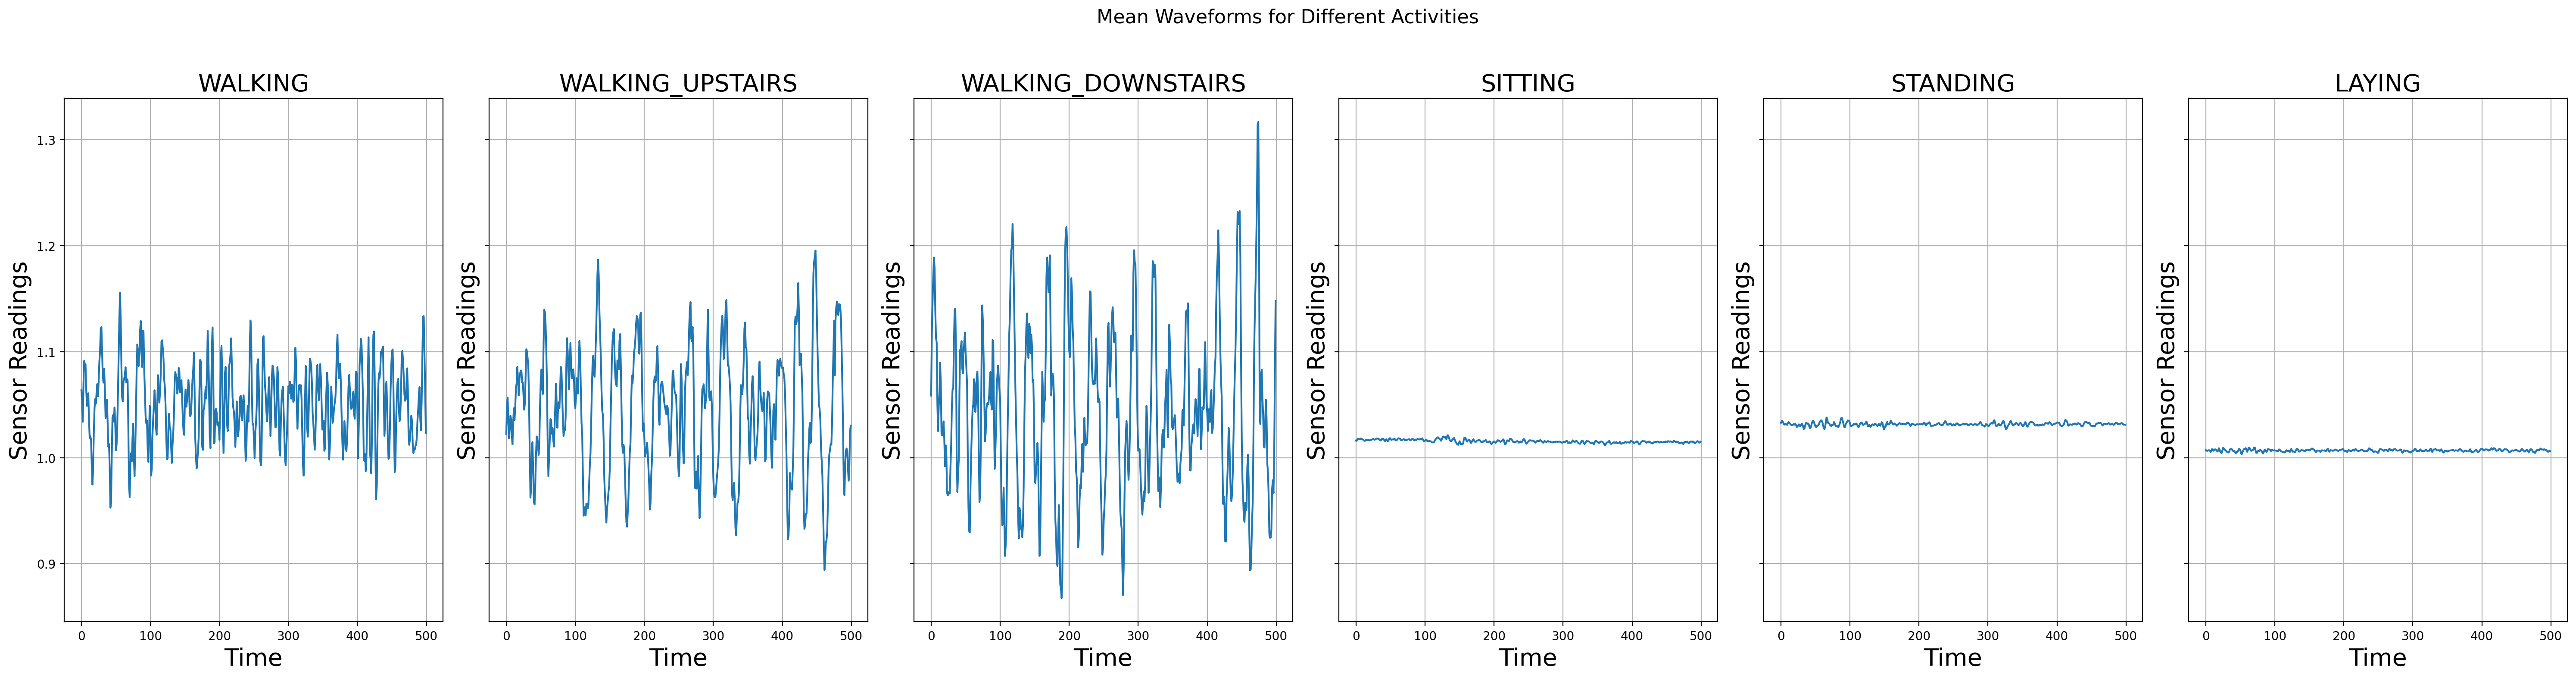

In [8]:
fig, axes = plt.subplots(1, 6, figsize=(30,8), sharey=True)
fig.suptitle('Mean Waveforms for Different Activities', fontsize=16)

for index in range(6):
    axes[index].plot(mean_acc_per_activity[index])
    axes[index].set_title(activity[index+1],fontsize=20)
    axes[index].set_xlabel('Time',fontsize=20)
    axes[index].set_ylabel('Sensor Readings',fontsize=20)
    axes[index].grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

These graphs show that the mean acceleration for dynamic activities varies continuously with time (periodic walking motion). The ones for static activities are stable and flat. Given the substantial distinctions between these two classes, a simple threshold or rule-based technique can be utilized to differentiate between static and dynamic activities. A machine learning model can also differ.

The model's performance can be improved by feature engineering and the extraction of relevant features.

The data may be noisy or inconsistent due to environmental factors, sensor flaws, and so on. Feature engineering and training optimisation can help to solve these issues.


Machine Learning model  is considered an effective solution whose performance can be enhanced by taking into account feature engineering, model selection, and evaluation. This thereby gives us more accurate decisions.


### Visualize the data using PCA. [1 marks]
### 1. Use PCA (Principal Component Analysis) on Total Acceleration (accx^2+accy^2+accz^2) to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

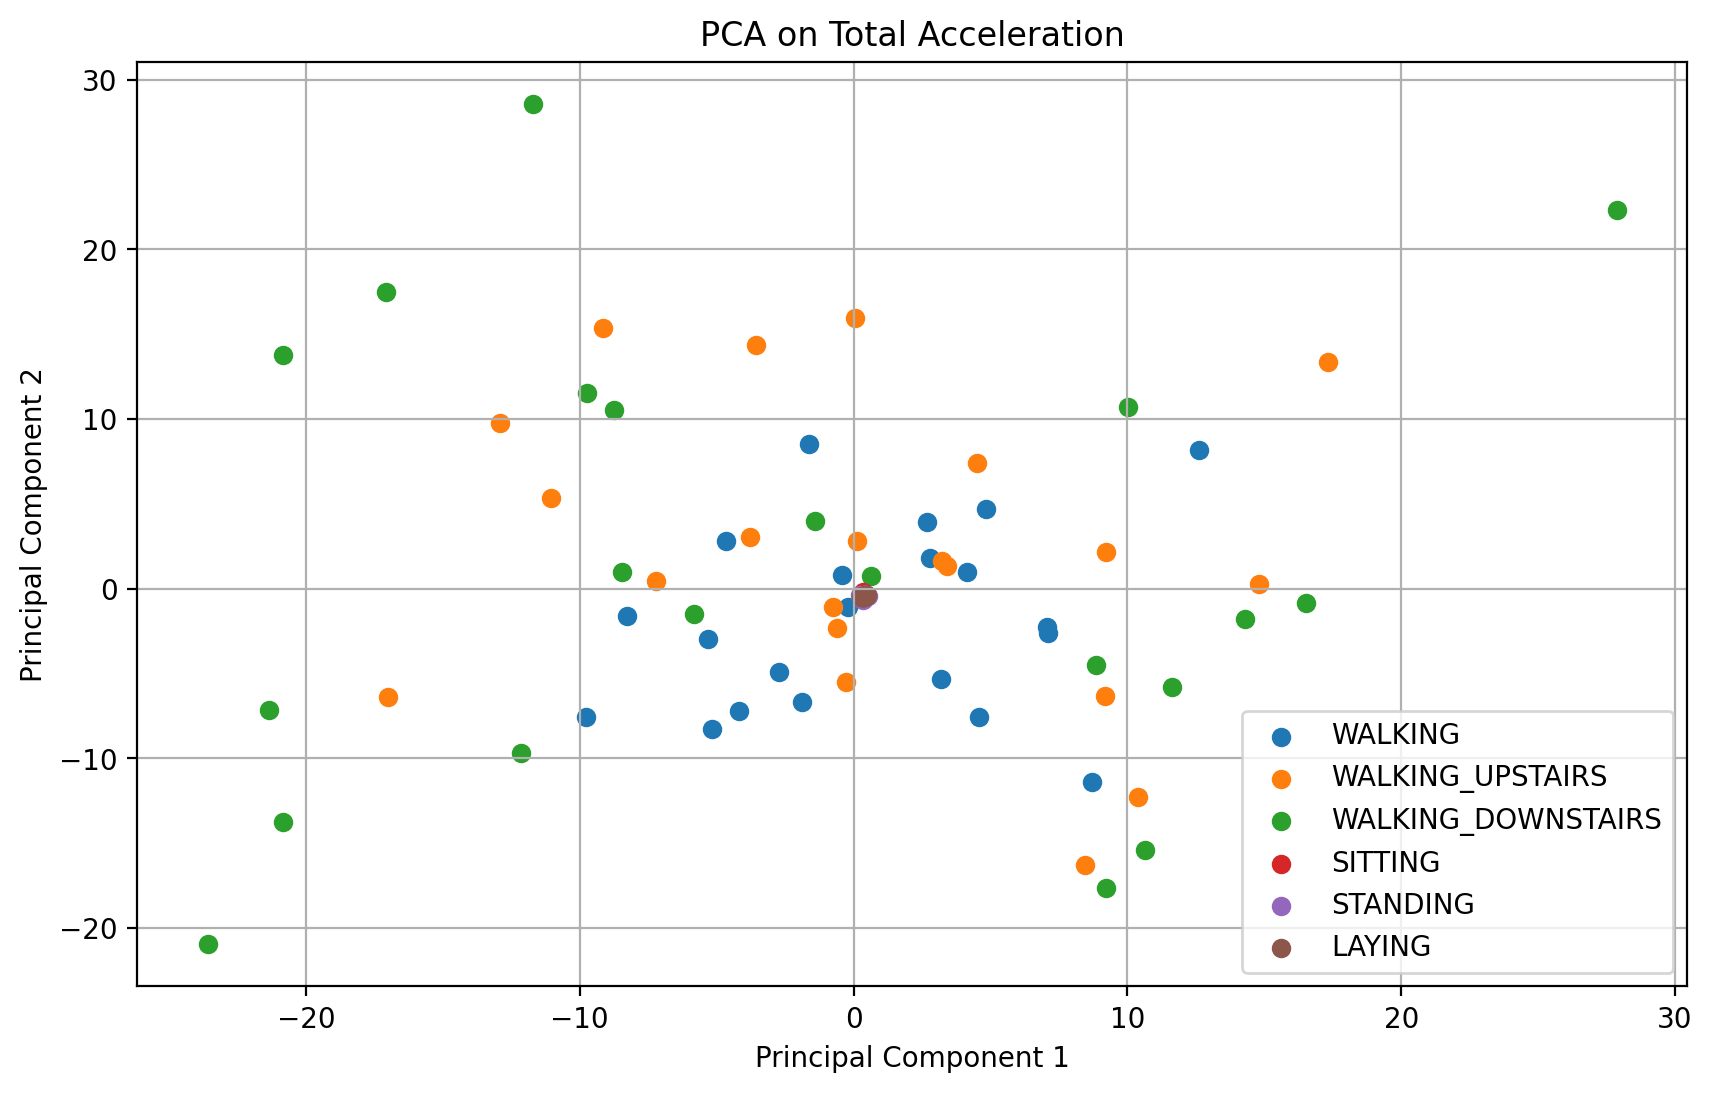

In [9]:
scaler1 = StandardScaler()
total_acceleration_scaled = scaler1.fit_transform(total_acceleration)

pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(total_acceleration_scaled)


# Plot the PCA results
plt.figure(figsize=(10, 6))
for i in np.unique(y_train):
    plt.scatter(X_pca1[y_train == i, 0], X_pca1[y_train == i, 1], label=activity[i])

plt.title('PCA on Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### 2. Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(confi

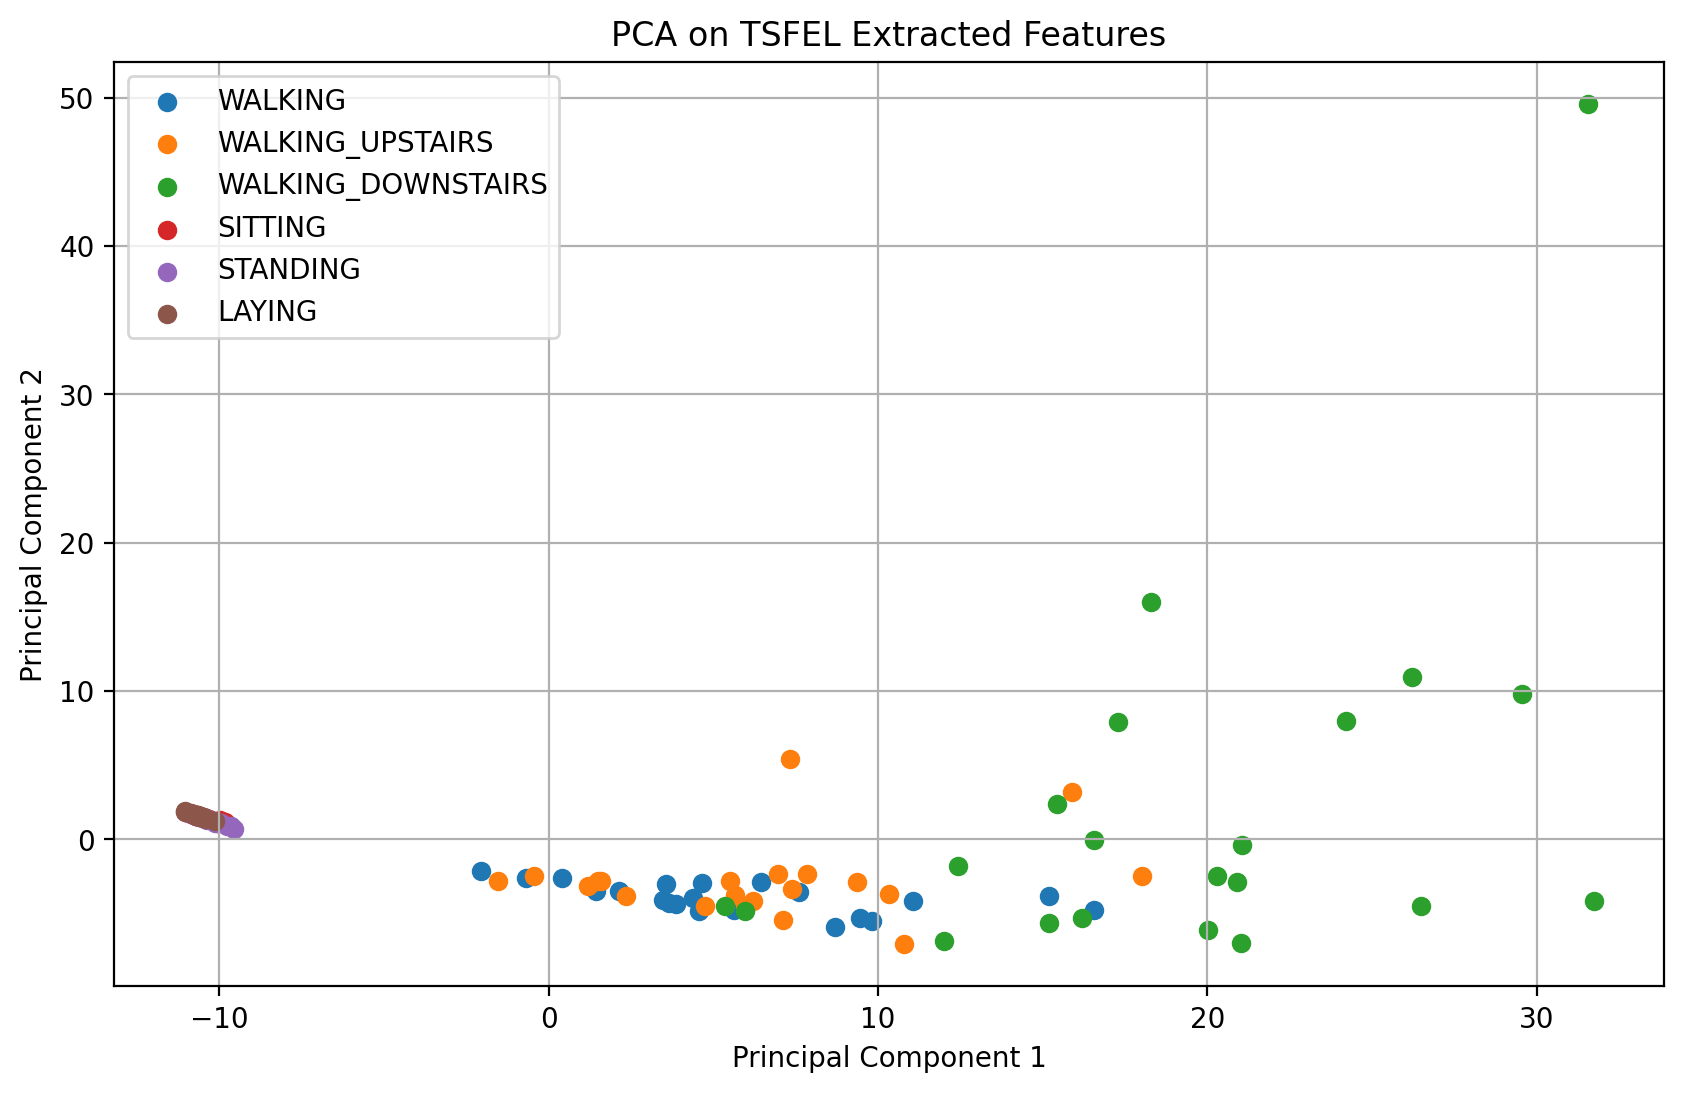

In [10]:
def feature_extraction(X):
    config = tsfel.get_features_by_domain()
    features = []
    
    for sample in X:
        df = pd.DataFrame(sample, columns=['total_acc'])
        try:
            # Extract features from the time series data
            sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
            
            # Flatten the features to ensure they are 1D
            sample_features_flattened = sample_features.values.flatten()
            features.append(sample_features_flattened)
        except Exception as e:
            print(f"Error in extracting features: {e}")
    
    # Converting the list of features to a 2D DataFrame
    return pd.DataFrame(features)

# total_acceleration = np.sqrt(np.sum(X_train**2, axis=2))
X_features = feature_extraction(total_acceleration)
# print(X_features.shape)

# Standardize the features
scaler2 = StandardScaler()
X_features_scaled = scaler2.fit_transform(X_features)

# Apply PCA to reduce from high dimensionality to 2D
pca2 = PCA(n_components=2)
X_pca_features = pca2.fit_transform(X_features_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 6))
for i in np.unique(y_train):
    plt.scatter(X_pca_features[y_train == i, 0], X_pca_features[y_train == i, 1], label=activity[i])

plt.title('PCA on TSFEL Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

### 3.Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\1024132589.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train_561 = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\1024132589.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train_561 = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)


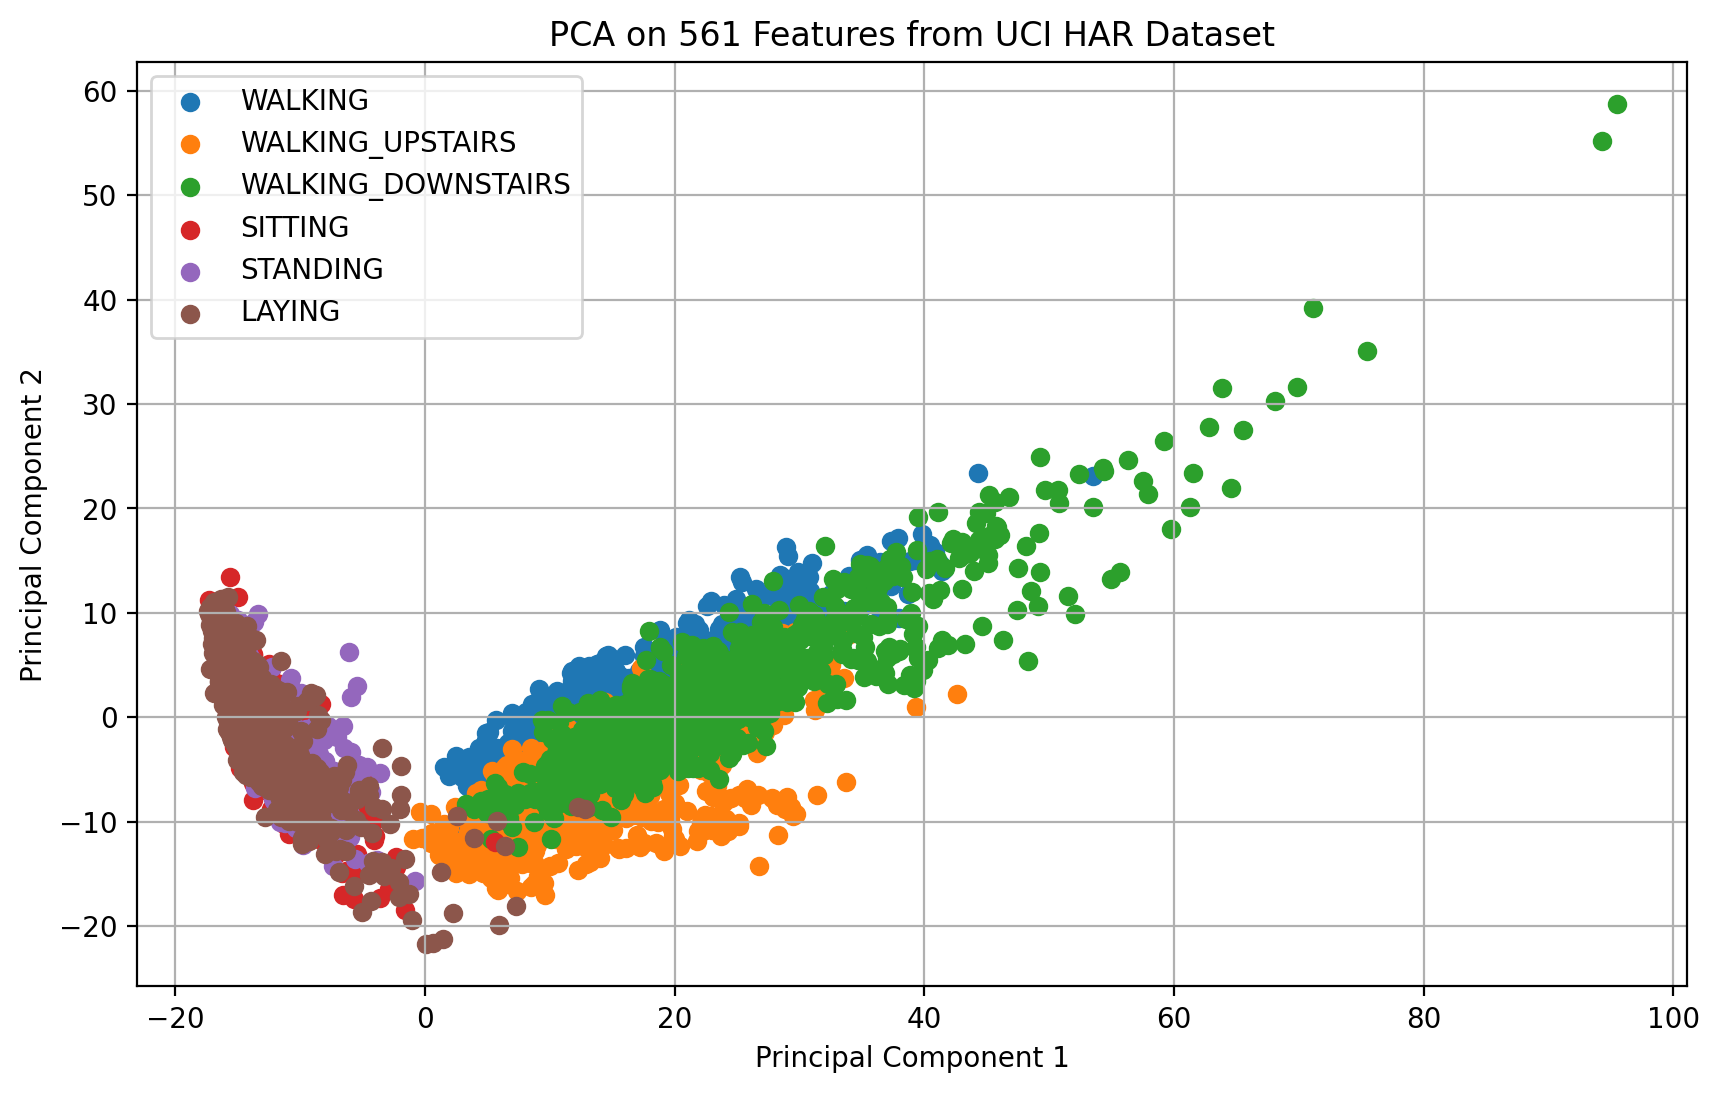

In [21]:
# Load the 561-feature datasets
X_train_561 = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train_561 = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

scaler3 = StandardScaler()
X_train_561_scaled = scaler3.fit_transform(X_train_561)

# Apply PCA to reduce from 561 features to 2D
pca3= PCA(n_components=2)
X_pca3 = pca3.fit_transform(X_train_561_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 6))
for i in np.unique(y_train_561):
    plt.scatter(X_pca3[y_train_561[0] == i, 0], X_pca3[y_train_561[0] == i, 1], label=activity[i])

plt.title('PCA on 561 Features from UCI HAR Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### 4. Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?


PCA on total acceleration can be effective for separating activities with significant differences in acceleration magnitude but might miss more subtle variations or time dependencies. The classes appear to be moderately separated, especially between "SITTING" and "WALKING_UPSTAIRS." However, there is some overlap between "WALKING" and "WALKING_DOWNSTAIRS."

PCA on TSFEL Features:TSFEL offers an extensive collection of domain-specific features that are intended to record significant time series attributes. 
The classes are more clearly separated compared to the total acceleration visualization. Because it incorporates several significant aspects rather than depending only on the raw signal, this method frequently produces the most proper and educational PCA visualisation.

Features of the Raw Dataset: Preserves all of the original data; nevertheless, PCA on this high-dimensional data may be noisy and difficult to understand. It might capture too much information, which could cause the visualisation to have overlapping clusters.

There is no way to distinguish one particular activity from another in the PCA plot of total acceleration. Plotting the pca on the dataset features depicts overlap of classes but all the different classes seems to have grouped together(formed clusters). Plot on PCA on dataset features is similar to that of plot on PCA on TSFEL features. But the datafeatures plot captures too much information leading to overlapping.

While there are still some overlapping clusters in the tsfel pca plot, the LAYING class is separated along the first principle component. This suggests that the first principal component is gathering appropriate information.
     There are several causes of overlapping structures in this tsfel plot.
It's possible that the TSFEL features aren't capturing the most essential aspects of the differences between them.It could be useful to investigate alternative feature sets or refining the TSFEL feature extraction process. The data might inherently have overlapping regions for different activity classes, making it difficult to separate them even with optimal feature engineering and dimensionality reduction.

Among the three, PCA on TSFEL features is the better one as one class is separated.


### Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features?

In [12]:

X_features_scaled_df = pd.DataFrame(X_features_scaled)  # Features from TSFEL
X_train_561_scaled_df= pd.DataFrame(X_train_561_scaled)  # Features from the dataset

# Calculate correlation matrices
corr_matrix_tsfel = X_features_scaled_df.corr()
corr_matrix_provided = X_train_561_scaled_df.corr()

# Display the correlation matrices
print("TSFEL Features Correlation Matrix:")
print(corr_matrix_tsfel)

print("\nDataset Provided Features Correlation Matrix:")
print(corr_matrix_provided)

# Function to find highly correlated features
def find_highly_correlated_features(corr_matrix, threshold=0.8):
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return correlated_pairs

# Find highly correlated features
highly_correlated_tsfel = find_highly_correlated_features(corr_matrix_tsfel)
highly_correlated_provided = find_highly_correlated_features(corr_matrix_provided)

print("\nHighly Correlated Features (TSFEL):")
for feature1, feature2, corr in highly_correlated_tsfel:
    print(f"{feature1} and {feature2} with correlation {corr:.2f}")

print("\nHighly Correlated Features (Dataset Provided):")
for feature1, feature2, corr in highly_correlated_provided:
    print(f"{feature1} and {feature2} with correlation {corr:.2f}")

# Identify redundant features
def find_redundant_features(correlated_pairs):
    redundant_features = set()
    for feature1, feature2, _ in correlated_pairs:
        # redundant_features.add(feature1)
        redundant_features.add(feature2)
    return redundant_features

# Find redundant features
redundant_features_tsfel = find_redundant_features(highly_correlated_tsfel)
redundant_features_provided = find_redundant_features(highly_correlated_provided)

print("\nRedundant Features (TSFEL):")
print(redundant_features_tsfel)

print("\nRedundant Features (Dataset Provided):")
print(redundant_features_provided)


TSFEL Features Correlation Matrix:
          0         1         2         3         4    5    6         7    \
0    1.000000  0.852968 -0.061725  1.000000 -0.091053  NaN  NaN -0.928992   
1    0.852968  1.000000 -0.090774  0.852968  0.044417  NaN  NaN -0.665991   
2   -0.061725 -0.090774  1.000000 -0.061725 -0.147888  NaN  NaN  0.018201   
3    1.000000  0.852968 -0.061725  1.000000 -0.091053  NaN  NaN -0.928992   
4   -0.091053  0.044417 -0.147888 -0.091053  1.000000  NaN  NaN  0.155467   
..        ...       ...       ...       ...       ...  ...  ...       ...   
379  0.905486  0.568775 -0.026099  0.905486 -0.164574  NaN  NaN -0.932944   
380  0.917025  0.597080 -0.024786  0.917025 -0.135000  NaN  NaN -0.943829   
381  0.911526  0.616185 -0.022620  0.911526 -0.100782  NaN  NaN -0.936631   
382  0.881867  0.618102 -0.019320  0.881867 -0.067624  NaN  NaN -0.904917   
383       NaN       NaN       NaN       NaN       NaN  NaN  NaN       NaN   

          8    9    ...       374       


# TASK 2
### Use Sklearn Library to train Decision Tress.
#### 1. Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.
#### 2. Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.
#### 3. Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.
#### 4. Compare the results of the three models. Which model do you think is better?

In [18]:
# Initialize the Decision Tree classifier
classifier1 = DecisionTreeClassifier(random_state=42)

# Train the model
classifier1.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flattening the data for training

# Make predictions
y_pred1 = classifier1.predict(X_test.reshape(X_test.shape[0], -1))  # Flattening the data for prediction

# Calculate metrics
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1, average='weighted')  # Use 'weighted' for multi-class
recall1 = recall_score(y_test, y_pred1, average='weighted')  # Use 'weighted' for multi-class
conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Print the results
print("For the decision tree model using the raw accelerometer data:")
print(f"Accuracy: {accuracy1:.3f}")
print(f"Precision: {precision1:.3f}")
print(f"Recall: {recall1:.3f}")
print(f"Confusion Matrix:\n{conf_matrix1}")

For the decision tree model using the raw accelerometer data:
Accuracy: 0.611
Precision: 0.561
Recall: 0.611
Confusion Matrix:
[[2 2 2 3 0 0]
 [2 5 1 0 1 0]
 [4 2 1 1 0 1]
 [0 0 0 8 1 0]
 [0 1 0 0 8 0]
 [0 0 0 0 0 9]]


In [19]:

X_train_features = feature_extraction(total_acceleration)
total_acceleration_test = np.sqrt(np.sum(X_test**2, axis=2))
X_test_features = feature_extraction(total_acceleration_test)


scaler2 = StandardScaler()
X_train_features_scaled = scaler2.fit_transform(X_train_features)
X_test_features_scaled = scaler2.transform(X_test_features)

# Initialize the Decision Tree classifier
classifier2 = DecisionTreeClassifier(random_state=42)

# Train the model
classifier2.fit(X_train_features_scaled, y_train)

# Make predictions
y_pred2 = classifier2.predict(X_test_features_scaled)

# Calculate metrics
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, average='weighted')  # Use 'weighted' for multi-class
recall2 = recall_score(y_test, y_pred2, average='weighted')  # Use 'weighted' for multi-class
conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Print the results
print("For the decision tree model using the features obtained by TSFEL:")
print(f"Accuracy: {accuracy2:.3f}")
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"Confusion Matrix:\n{conf_matrix2}")


C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(config, df, sample_rate = 50 ,verbose=False)  # Disable progress bar
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\3302059978.py:9: UserWarning: Using default sampling frequency set in configuration file.
  sample_features = tsfel.time_series_features_extractor(confi

For the decision tree model using the features obtained by TSFEL:
Accuracy: 0.704
Precision: 0.710
Recall: 0.704
Confusion Matrix:
[[6 2 1 0 0 0]
 [1 6 1 0 1 0]
 [0 1 8 0 0 0]
 [0 0 0 5 1 3]
 [0 0 0 0 8 1]
 [0 0 0 2 2 5]]


In [20]:
X_train_561 = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train_561 = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
X_test_561 = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test_561 = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)

scaler3 = StandardScaler()
X_train_561_scaled = scaler3.fit_transform(X_train_561)
X_test_561_scaled = scaler3.fit_transform(X_test_561)

# Initialize the classifier
classifier3 = DecisionTreeClassifier(random_state=42)

# Train the model
classifier3.fit(X_train_561, y_train_561)

# Make predictions
y_pred3 = classifier3.predict(X_test_561)

# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test_561, y_pred3)
precision3 = precision_score(y_test_561, y_pred3, average='weighted')
recall3 = recall_score(y_test_561, y_pred3, average='weighted')
conf_matrix3 = confusion_matrix(y_test_561, y_pred3)

# Print the results
print("For the decision tree model using features provided in the dataset:")
print(f"Accuracy: {accuracy3:.3f}")
print(f"Precision: {precision3:.3f}")
print(f"Recall: {recall3:.3f}")
print("Confusion Matrix:")
print(conf_matrix3)

C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\119791697.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train_561 = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\119791697.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train_561 = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\119791697.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test_561 = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
C:\Users\dhrut\AppData\Local\Temp\ipykernel_15936\119791697.py:4: FutureWarn

For the decision tree model using features provided in the dataset:
Accuracy: 0.862
Precision: 0.863
Recall: 0.862
Confusion Matrix:
[[456  24  16   0   0   0]
 [ 74 369  28   0   0   0]
 [ 19  53 348   0   0   0]
 [  0   0   0 374 117   0]
 [  0   0   0  75 457   0]
 [  0   0   0   0   0 537]]


Due to the well chosen and efficient features provided in the dataset, the decision tree model trained on pre-engineered features (Model 3) is the best option. Model 2 (TSFEL features) and Model 1 (raw accelerometer data) are the next best options.

High-dimensional data in model 1 might be noisy and challenging for the decision tree to process efficiently. There is a chance that the model will overfit or underfit due to its inability to learn meaningful decision boundaries. It has lesser recall, accuracy, and precision than feature-designed methods because decision trees might not be able to adequately capture intricate time-series patterns in the absence of engineering features.

TSFEL retrieves a useful collection of features in model 2. This gives the signal a more condensed and abstract form, which could improve categorization. Poor performance of this model may result from poorly calibrated or inappropriate feature extraction from the TSFEL feature extraction. In addition to adding complexity, feature extraction might cause overfitting if it is not properly generalized. Because the derived features are intended to capture significant patterns essential to activity recognition, this method performs better than raw data.

Model 3 captures the most pertinent components of the data, the features in the dataset are often pre-selected and fine-tuned for activity recognition. Because they are domain-specific, Model 3's features are frequently simpler to understand than TSFEL characteristics, which might be more abstract. Given that these features are usually problem-specific and created with domain expertise, this model provides the best performance.

### Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree.

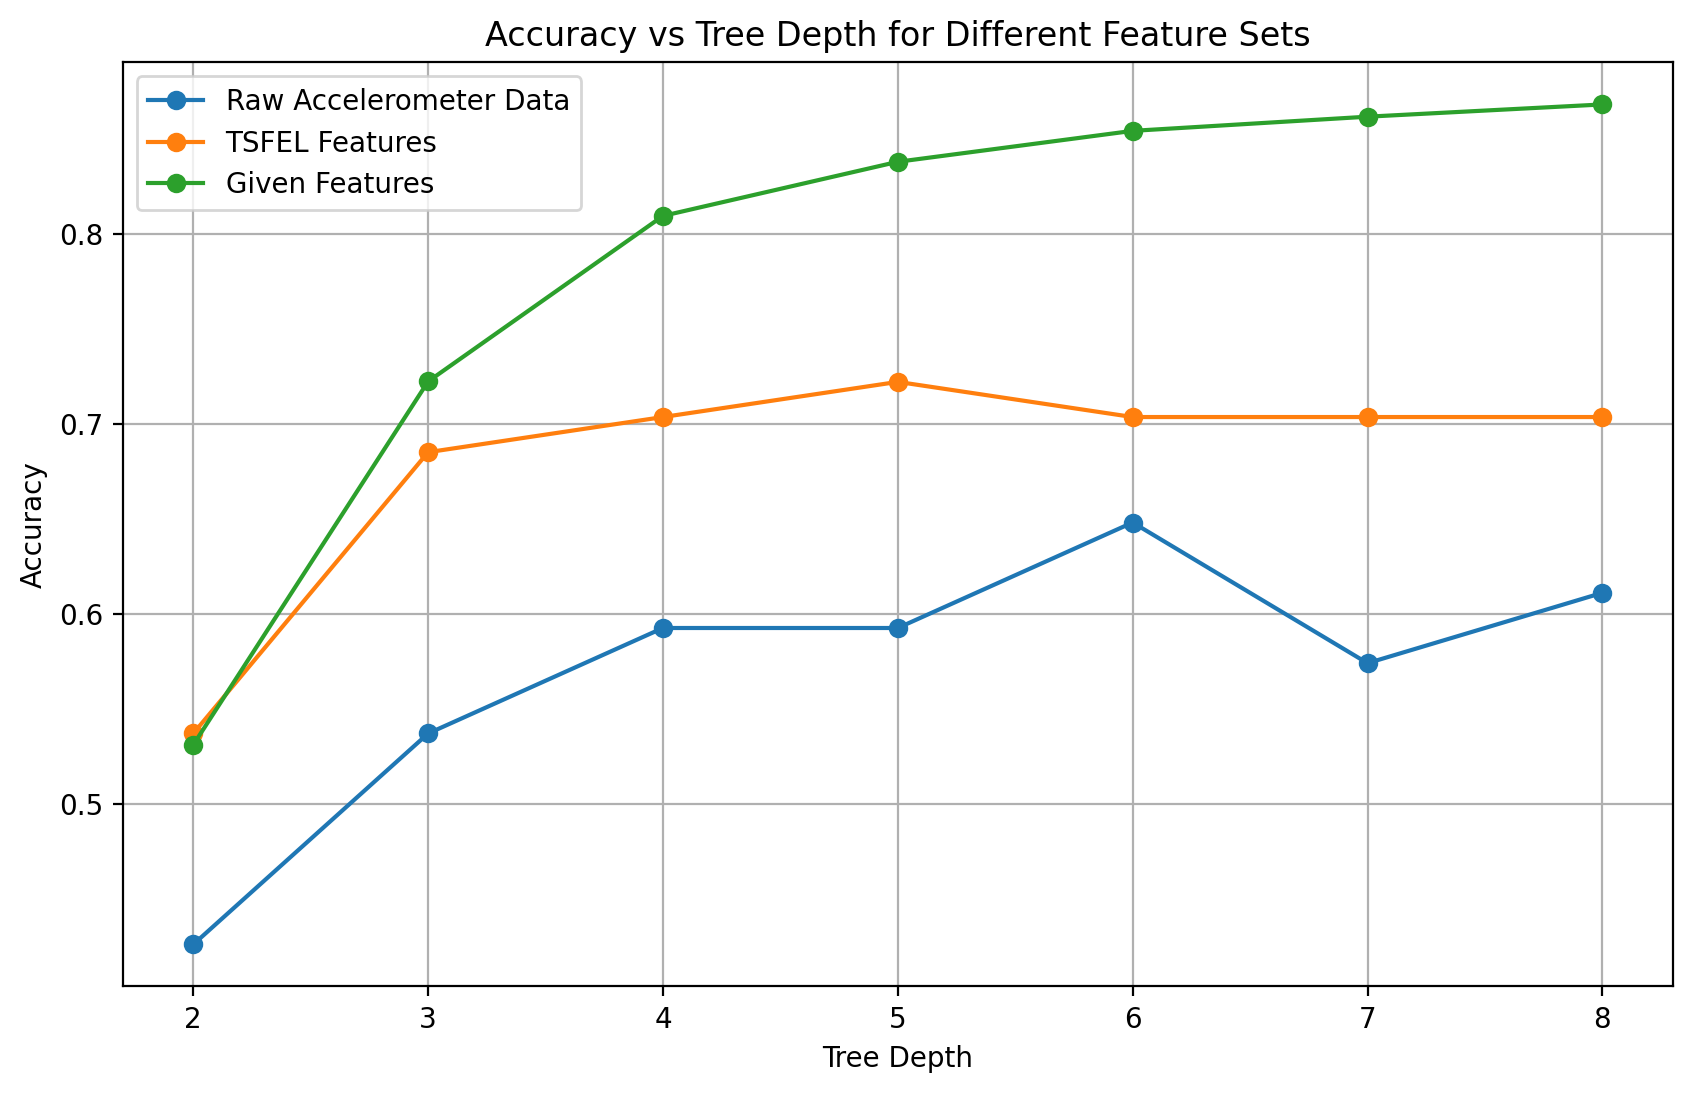

In [16]:
# Tree depths to explore
depths = range(2, 9)

acc_raw = []
acc_tsfel = []
acc_given = []

# Method 1: Raw Accelerometer Data
for depth in depths:
    clf1 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf1.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    y_pred1 = clf1.predict(X_test.reshape(X_test.shape[0], -1))
    acc_raw.append(accuracy_score(y_test, y_pred1))

# Method 2: TSFEL Features
for depth in depths:
    clf2 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf2.fit(X_train_features_scaled, y_train)
    y_pred2 = clf2.predict(X_test_features_scaled)
    acc_tsfel.append(accuracy_score(y_test, y_pred2))

# Method 3: Given Features
for depth in depths:
    clf3 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf3.fit(X_train_561, y_train_561)  # Flattening for training
    y_pred3 = clf3.predict(X_test_561)  # Flattening for testing
    acc_given.append(accuracy_score(y_test_561, y_pred3))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, acc_raw, label='Raw Accelerometer Data', marker='o')
plt.plot(depths, acc_tsfel, label='TSFEL Features', marker='o')
plt.plot(depths, acc_given, label='Given Features', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth for Different Feature Sets')
plt.legend()
plt.grid(True)
plt.show()


The confusion matrices give us a deeper insight into which activities the models struggle with.

1. Model Trained on Raw Accelerometer Data:
    \begin{bmatrix}
2 & 2 & 2 & 3 & 0 & 0 \\
2 & 5 & 1 & 0 & 1 & 0 \\
4 & 2 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 8 & 1 & 0 \\
0 & 1 & 0 & 0 & 8 & 0 \\
0 & 0 & 0 & 0 & 0 & 9
\end{bmatrix}
 this is the confusion matrix.

The distinction between "WALKING" (class 1) and "WALKING UPSTAIRS" (class 2) is difficult for the model to make. For example, the model predicted "WALKING UPSTAIRS" when it should have predicted "WALKING" and vice versa.
Confusion comes from the identical movement patterns of the two occupations.
It's common to misidentify "WALKING DOWNSTAIRS" as "WALKING" or "WALKING UPSTAIRS." Instead of successfully predicting class 3, the model repeatedly predicted other classes. This might be the case because it is difficult to distinguish between the three activities using raw data because they are all walking-based. All "LAYING" activities were properly classified by the model (9 out of 9). This is perhaps because, in contrast to other activities, "LAYING" has a distinct, low-motion pattern that is simpler for the model to identify.



1. Model Trained on TSFEL Features:   
  \begin{bmatrix}
6 & 2 & 1 & 0 & 0 & 0 \\
1 & 6 & 1 & 0 & 1 & 0 \\
0 & 1 & 8 & 0 & 0 & 0 \\
0 & 0 & 0 & 5 & 1 & 3 \\
0 & 0 & 0 & 0 & 8 & 1 \\
0 & 0 & 0 & 2 & 2 & 5
\end{bmatrix}
 this is the confusion matrix.

   
Compared to the model trained on raw data, the one trained on TSFEL characteristics is more effective in differentiating between "WALKING" (class 1) and "WALKING UPSTAIRS" (class 2).Since there is less misunderstanding, the TSFEL characteristics have identified several helpful patterns which help in distinguishing between these activities. In the majority of instances, "WALKING DOWNSTAIRS" (class 3) is correctly classified, with fewer incorrect classifications.
This activity's distinctive characteristics appear to be well captured by the TSFEL features, which aids in the model's improved ability to recognize it. The differences between "STANDING" (class 5) and "SITTING" (class 4) as well as between "LAYING" (class 6) and "SITTING" (class 4) are still unclear. Despite the extracted features, these activities are difficult to identify from one another because of their identical postures or low motion. The model's overall performance is still below average, and it still has trouble telling apart low-motion behaviors like "LAYING" from "SITTING" and "STANDING" from "SITTING."

3.Model Trained on Pre-Engineered Dataset Features:

   \begin{bmatrix}
456 & 24 & 16 & 0 & 0 & 0 \\
74 & 369 & 28 & 0 & 0 & 0 \\
19 & 53 & 348 & 0 & 0 & 0 \\
0 & 0 & 0 & 374 & 117 & 0 \\
0 & 0 & 0 & 75 & 457 & 0 \\
0 & 0 & 0 & 0 & 0 & 537
\end{bmatrix}
 this is the confusion matrix.

    
When using pre-engineered features, the model operates incredibly effectively. With high numbers in the diagonal entries (true positives), it accurately labels the majority of instances for each activity. Tasks such as "WALKING" (class 1), "WALKING UPSTAIRS" (class 2), and "WALKING DOWNSTAIRS" (class 3) are distinctly divided, demonstrating how well the features capture their distinct qualities. With very few exceptions, the model distinguishes between "WALKING" and "WALKING UPSTAIRS" accurately. The majority of the time, "WALKING DOWNSTAIRS" is likewise accurately identified, suggesting that the pre-engineered features effectively capture the distinctions between these various walking activities. 
Despite some misunderstanding between "SITTING" (class 4) and "STANDING" (class 5), the paradigm nevertheless functions admirably overall. The identical low-motion aspects of these occupations are the cause of this misconception. They may have characteristics that overlap, which makes it difficult to distinguish between them.

Overall, the confusion matrices suggest that the models struggles with:

Similar Activities: "WALKING" vs. "WALKING UPSTAIRS" and "STANDING" vs. "SITTING."
Low Motion Activities: For "SITTING," "STANDING," and "LAYING," there’s confusion due to similar, low-variation signals.

The root cause of poor performance lies in the similarity between the activities and insufficient feature representation to capture subtle differences in motion or posture.
